In [1]:
import sqlite3

# connect to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# add some data (product, quantity, price)
sales_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.0),
    ("Orange", 8, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 12, 1.0),
    ("Orange", 7, 3.0)
]

# clear old data
cursor.execute("DELETE FROM sales")
# insert new data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# fetch all data
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# print each row
print("Current sales table:")
for row in rows:
    print(row)

conn.commit()
conn.close()


Current sales table:
(7, 'Apple', 10, 2.5)
(8, 'Banana', 15, 1.0)
(9, 'Orange', 8, 3.0)
(10, 'Apple', 5, 2.5)
(11, 'Banana', 12, 1.0)
(12, 'Orange', 7, 3.0)


In [3]:

import pandas as pd

# connect to the database
conn = sqlite3.connect("sales_data.db")

# run the basic SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# close the connection
conn.close()

# print the results
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         27     27.0
2  Orange         15     45.0


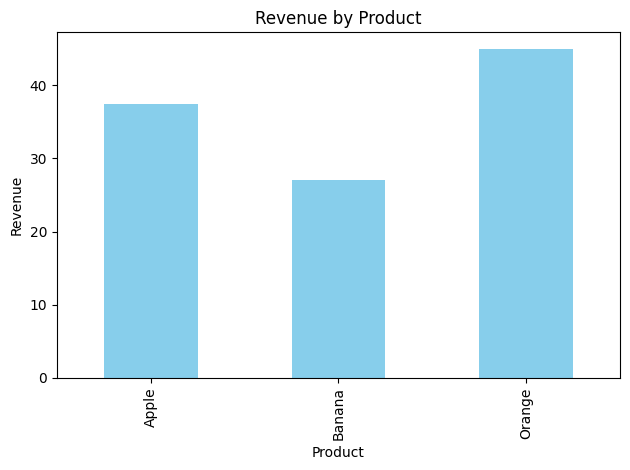

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
# plot a simple bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)

# chart details
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saves the chart as an image
plt.show()
plt.savefig("sales_chart.png")